In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import networkx as nx
import seaborn as sns

from urllib.request import Request, urlopen
from urllib.parse import urlencode
from collections import Counter
from zipfile import ZipFile
from io import BytesIO
from xmltodict import parse

# Bar Charts

In [231]:
data = pd.read_csv('https://data.ibb.gov.tr/dataset/badd88ba-e0af-4f7d-bb7d-18dc913a7a65/resource/acc4c5d6-7654-48fb-a460-bffc6050f1b2/download/2019-2020-ismek-kesin-kaytl-kursiyer-verileri.csv',
                   encoding='iso8859-9',
                   sep=';')
data

,Donem,Egitim Durumu,Engel Durumu,Calisma Durumu,Alan,Program,Hak Edilen Belge Tipi,Kurs Merkezi,Kurs Merkezi İlcesi,Tercih Sebebi,Yas Araligi
0,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Dil Egitimleri,Ingilizce A2 Seviyesi,Hak Etmedi,Dil Okulu,Sisli,"Meslek Edinmek, Meslegimde İlerlemek",20-30 Yas Arasi
1,2019-2020,Lise,Engeli Olmayan,Calismiyor,Spor,Fitness (Kadin),Ismek Sertifika,Silivri Spor Egitim Merkezi,Silivri,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20-30 Yas Arasi
2,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Dil Egitimleri,Ingilizce A1 Seviyesi,Meb Sertifika,Tuzla Yayla Mahallesi,Tuzla,"Meslek Edinmek, Meslegimde İlerlemek",30-40 Yas Arasi
3,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Spor,Crunch (Kadin),Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti
4,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Spor,Stretching (Kadin),Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti
...,...,...,...,...,...,...,...,...,...,...,...
216760,2019-2020,Lisans,Engeli Olmayan,Calismiyor,Bilisim Teknolojileri,Powerpoint 2019 Kullanimi,Hak Etmedi,Uzaktan Egitim,Esenler,Sosyal Cevre Edinmek,40-50 Yas Arasi
216761,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Grafik Ve Teknik Tasarim,Illustrator Cizim Uygulamalari 3,Ismek Sertifika,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde İlerlemek",20-30 Yas Arasi
216762,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Bilisim Teknolojileri,Egitimde Google Classroom Kullanimi,Hak Etmedi,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde İlerlemek",20-30 Yas Arasi
216763,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Bilisim Teknolojileri,Excel 2019 Kullanimi,Hak Etmedi,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde İlerlemek",20-30 Yas Arasi


In [232]:
Counter(data['Calisma Durumu'])

Counter({'Ogrenci': 47904,
         'Calismiyor': 103132,
         'Calisiyor': 58390,
         'Emekli': 5752,
         'Bos': 1587})

<BarContainer object of 5 artists>

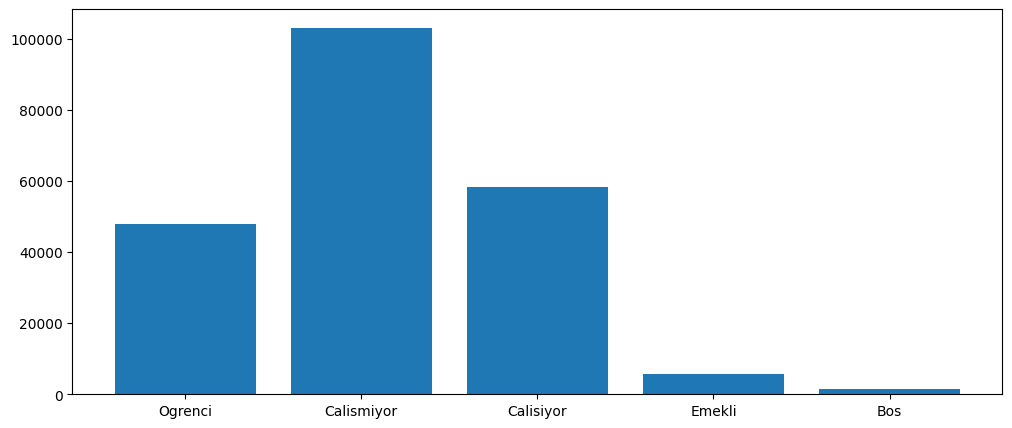

In [236]:
raw = Counter(data['Calisma Durumu'])
labels = list(raw.keys())
values = raw.values()

plt.figure(figsize=(12,5))
plt.bar(labels,values)

<BarContainer object of 10 artists>

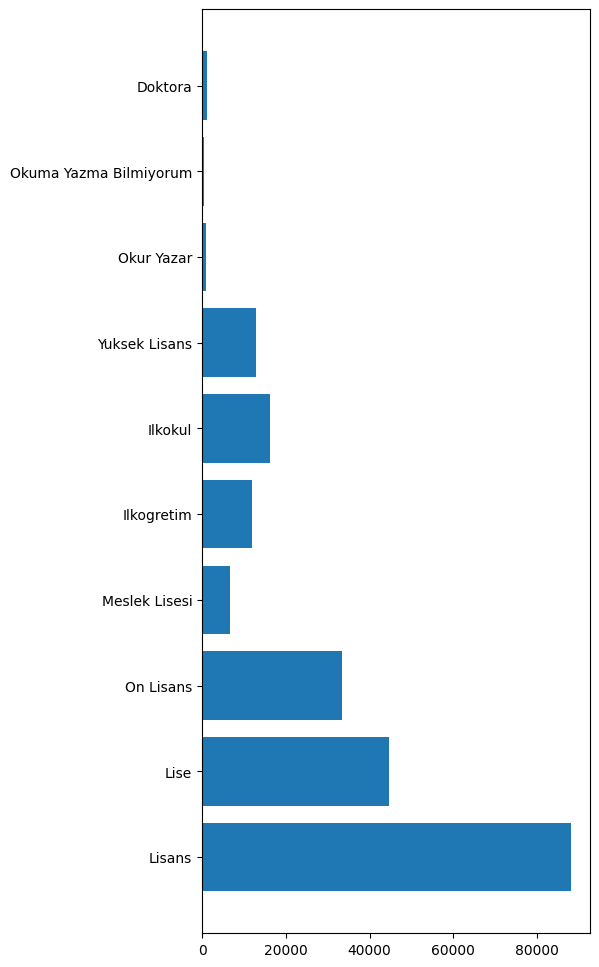

In [237]:
raw = Counter(data['Egitim Durumu'])
labels = list(raw.keys())
values = raw.values()

plt.figure(figsize=(5,12))
plt.barh(labels,values)

<BarContainer object of 10 artists>

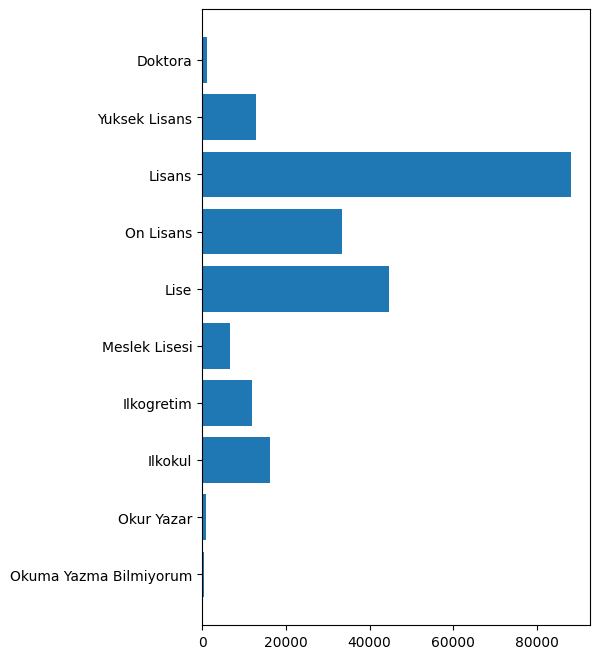

In [240]:
raw = Counter(data['Egitim Durumu'])

labels = ['Okuma Yazma Bilmiyorum', 'Okur Yazar', 'Ilkokul', 'Ilkogretim',  
          'Meslek Lisesi', 'Lise','On Lisans', 'Lisans', 'Yuksek Lisans', 
          'Doktora']

ys = [raw[label] for label in labels]

plt.figure(figsize=(5,8))
plt.barh(labels, ys)

In [243]:
def barChart(col,ls=None):
    raw = Counter(data[col])
    ys = raw.values()
    if ls == None:
        ls = list(raw.keys())
    plt.figure(figsize=(4,8))
    plt.barh(ls, ys)
    plt.show()

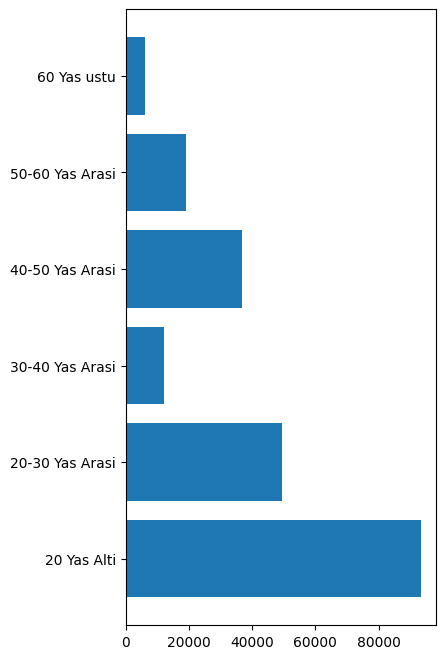

In [246]:
barChart('Yas Araligi',ls=['20 Yas Alti', '20-30 Yas Arasi', '30-40 Yas Arasi',
       '40-50 Yas Arasi', '50-60 Yas Arasi', '60 Yas ustu'])

In [71]:
np.unique(data['Alan'])

array(['Ahsap Tasarimi Ve Teknolojileri', 'Bilisim Teknolojileri',
       'Cocuk Gelisimi Ve Egitimi', 'Dil Egitimleri',
       'El Sanatlari Teknolojisi', 'Gastronomi Ve Mutfak Sanatlari',
       'Gida Teknolojisi', 'Giyim Uretim Teknolojileri',
       'Grafik Ve Fotograf', 'Grafik Ve Teknik Tasarim',
       'Guzellik Ve Sac Bakim Hizmetleri', 'Kisisel Gelisim Ve Egitim',
       'Kuyumculuk Teknolojisi', 'Kuyumculuk Ve Taki Tasarimi',
       'Mesleki Teknik Egitimler', 'Moda Tasarimi Ve Tekstil Teknolojisi',
       'Muhasebe Ve Finans', 'Muzik', 'Muzik Ve Gosteri Sanatlari',
       'Orgu Ve İsleme Sanatlari', 'Robotik Ve İnovasyon',
       'Sahne Ve Gosteri Sanatlari', 'Sanat Ve Tasarim', 'Seramik Ve Cam',
       'Spor', 'Susleme Sanatlari', 'Tekstil Tasarimi',
       'Tekstil Teknolojisi', 'Turizm Ve Otelcilik', 'Yabanci Diller',
       'Yiyecek İcecek Hizmetleri', 'Yonetim Ve Hizmet', 'Ziraat'],
      dtype=object)

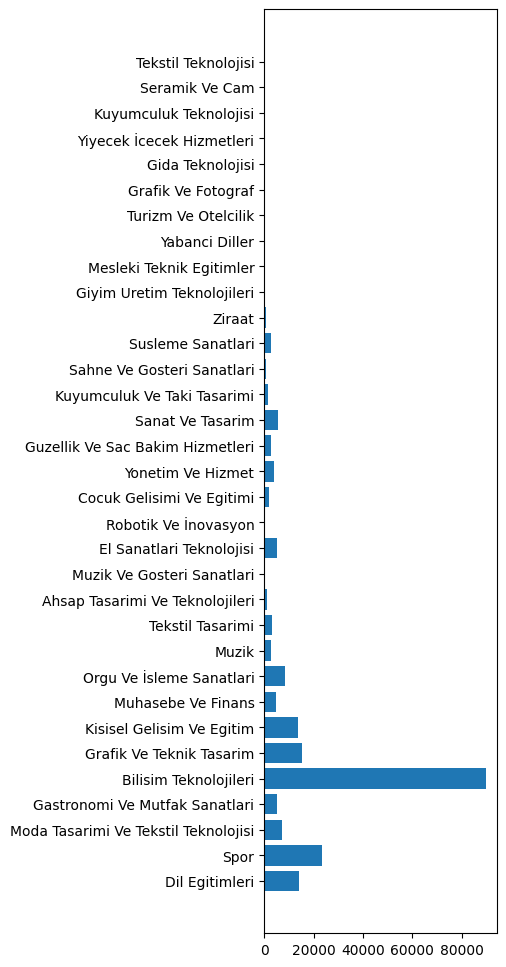

In [70]:
plt.figure(figsize=(3,12))
barChart('Alan')

# Pie Charts

In [72]:
def pieChart(col, ex=None):
    raw = Counter(data[col])
    ks = raw.keys()
    vs = raw.values()
    #vs = 100*np.array(list(raw.values()))/sum(raw.values())
    plt.pie(vs, labels=ks, explode=ex)
    plt.show()

In [73]:
help(plt.pie)

Help on function pie in module matplotlib.pyplot:

pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=True, data=None)
    Plot a pie chart.
    
    Make a pie chart of array *x*.  The fractional area of each wedge is
    given by ``x/sum(x)``.
    
    The wedges are plotted counterclockwise, by default starting from the
    x-axis.
    
    Parameters
    ----------
    x : 1D array-like
        The wedge sizes.
    
    explode : array-like, default: None
        If not *None*, is a ``len(x)`` array which specifies the fraction
        of the radius with which to offset each wedge.
    
    labels : list, default: None
        A sequence of strings providing the labels for each wedge
    
    colors : array-like, default: None
        A sequence of colors through which the pie chart will 

In [247]:
Counter(data['Calisma Durumu'])

Counter({'Ogrenci': 47904,
         'Calismiyor': 103132,
         'Calisiyor': 58390,
         'Emekli': 5752,
         'Bos': 1587})

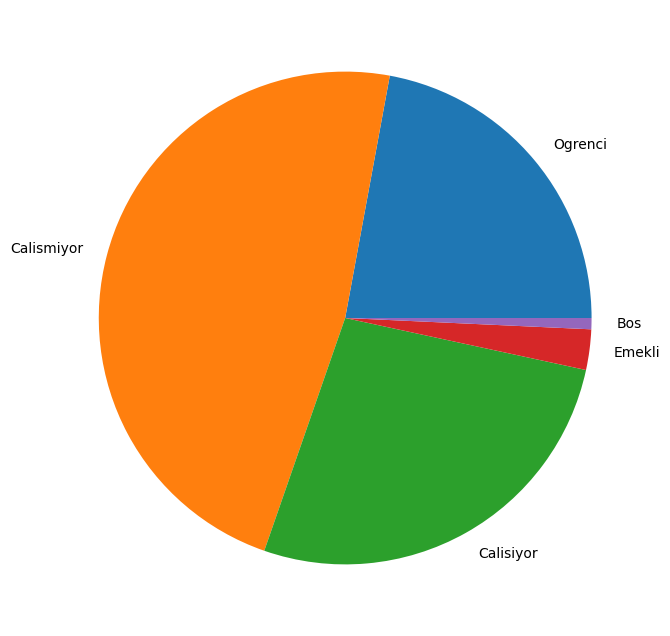

In [76]:
plt.figure(figsize=(8,8))
pieChart('Calisma Durumu')

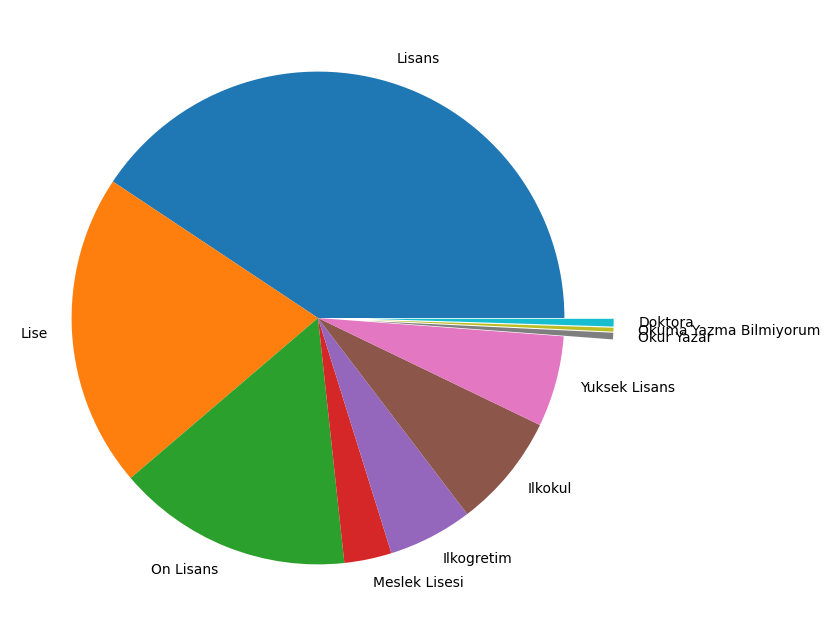

In [75]:
pieChart('Egitim Durumu',ex=[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,0.2])

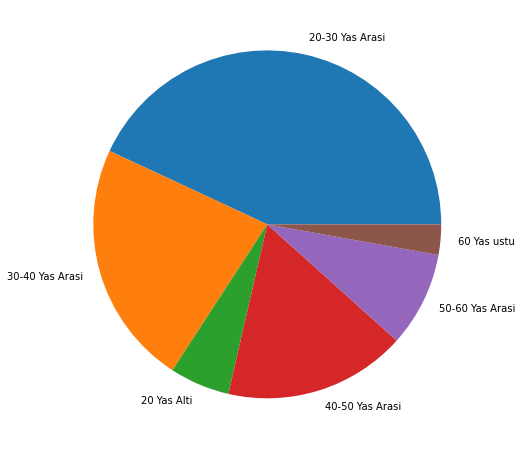

In [43]:
pieChart('Yas Araligi')

# Heat Maps

In [80]:
tmp = pd.crosstab(data['Egitim Durumu'], data['Yas Araligi'])
cross = tmp.loc[['Okuma Yazma Bilmiyorum', 'Okur Yazar', 'Ilkokul', 
                 'Ilkogretim', 'Meslek Lisesi', 'Lise', 'On Lisans', 
                 'Lisans', 'Yuksek Lisans', 'Doktora'],:]
cross

Yas Araligi,20 Yas Alti,20-30 Yas Arasi,30-40 Yas Arasi,40-50 Yas Arasi,50-60 Yas Arasi,60 Yas ustu
Egitim Durumu,,,,,,
Okuma Yazma Bilmiyorum,15,70,103,130,167,66
Okur Yazar,74,196,123,196,218,129
Ilkokul,1787,607,2568,6000,3953,1327
Ilkogretim,770,2049,2616,3634,2188,752
Meslek Lisesi,974,2465,1213,1177,623,285
Lise,5632,14020,9257,9125,5140,1472
On Lisans,1063,19396,7301,3843,1425,466
Lisans,1777,50408,20485,9984,4247,1232
Yuksek Lisans,7,3981,5136,2425,1030,346


<AxesSubplot:xlabel='Yas Araligi', ylabel='Egitim Durumu'>

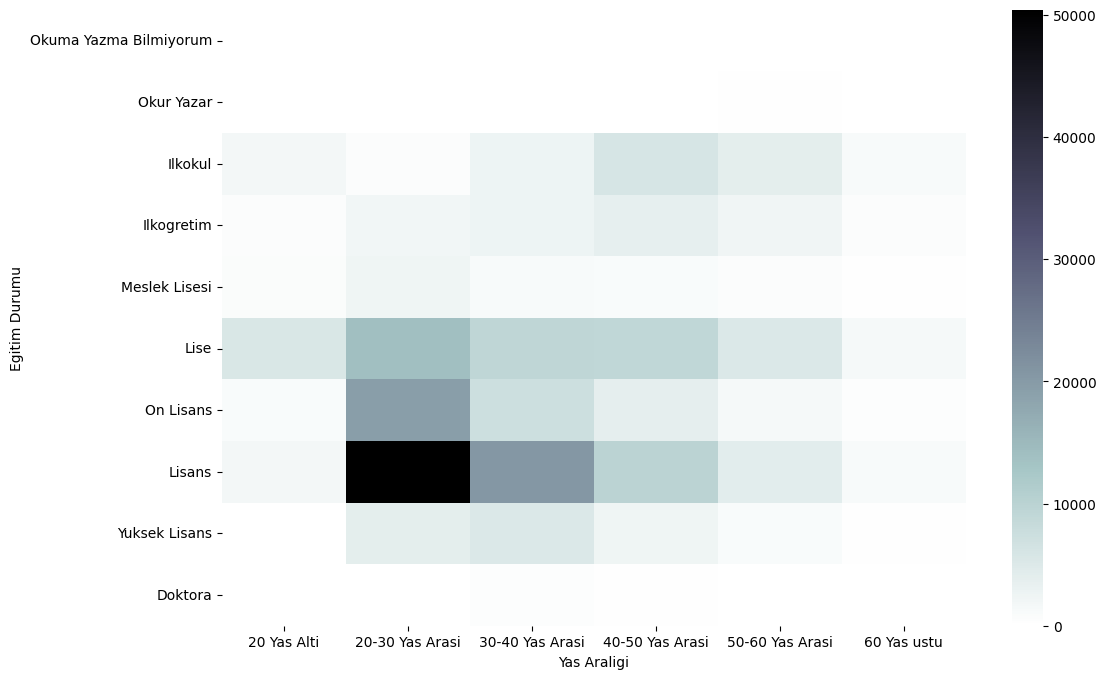

In [253]:
plt.rcParams['figure.figsize'] = 12,8
sns.heatmap(cross, cmap='bone_r')

# Stacked Bar Charts

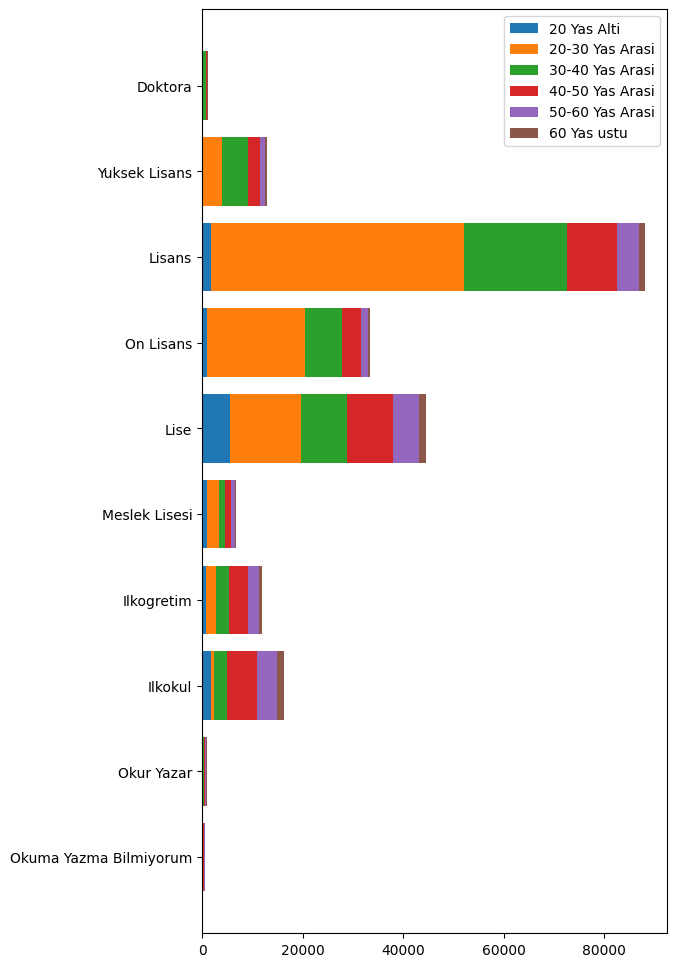

In [109]:
egitim = ['Okuma Yazma Bilmiyorum', 'Okur Yazar', 'Ilkokul', 'Ilkogretim', 
          'Meslek Lisesi', 'Lise', 'On Lisans', 'Lisans', 'Yuksek Lisans', 
          'Doktora']

yas = np.unique(data['Yas Araligi'])

fig, ax = plt.subplots(figsize = (6,12))

hs = np.zeros(len(egitim))
for x in yas:
    ax.barh(egitim, cross[x],left=hs)
    hs = hs + cross[x]
ax.legend(yas,loc='upper right')    

In [113]:
def stackedBarChart(cat1, cat2):
    xs = data[cat2]
    ys = data[cat1]

    cross = pd.crosstab(xs, ys)
    cross = cross/cross.sum()
    names1 = cross.columns
    names2 = cross.index
    
    fig, ax = plt.subplots()

    hs = np.zeros(len(names1))
    for x in names2:
        ys = cross.loc[x]
        ax.bar(names1, ys, bottom=hs)
        hs = hs + ys

    plt.figure(figsize = (15,8))
    ax.legend(names2,loc='upper left')

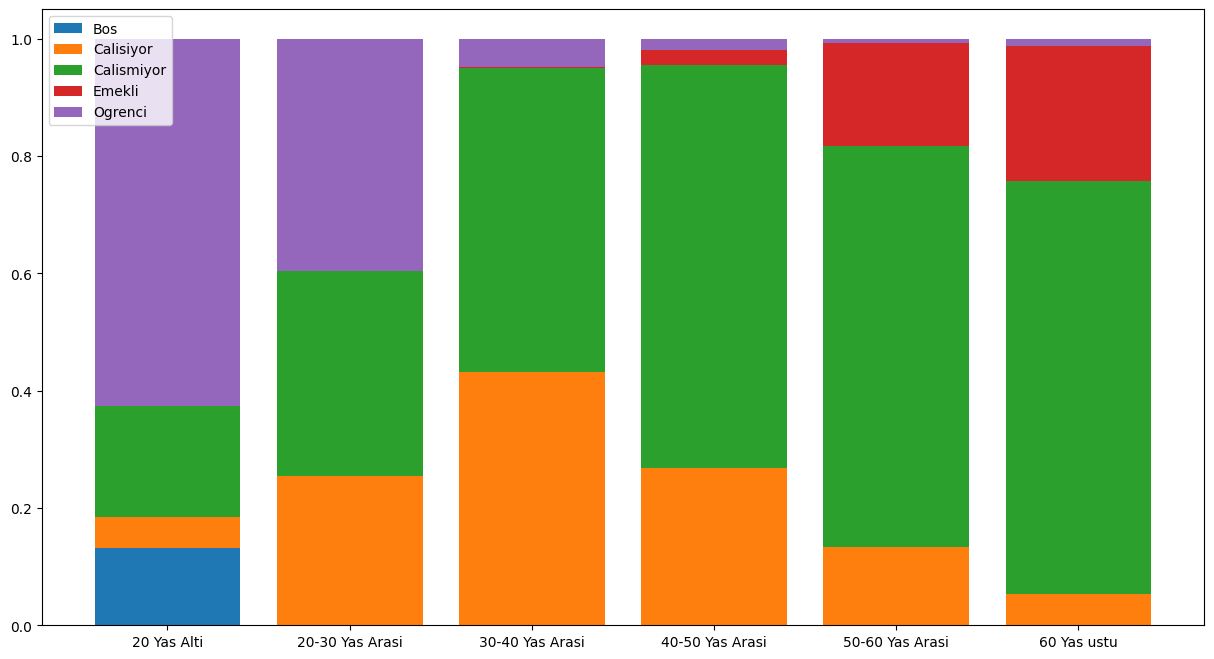

<Figure size 1500x800 with 0 Axes>

In [114]:
stackedBarChart('Yas Araligi', 'Calisma Durumu')

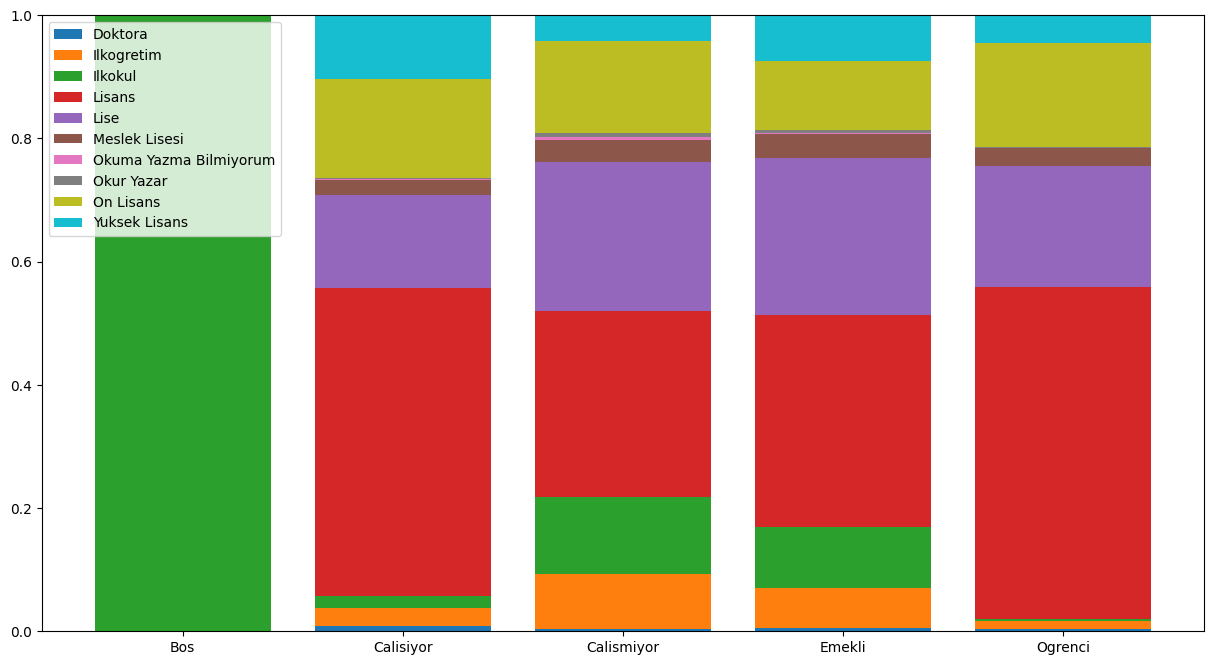

<Figure size 1500x800 with 0 Axes>

In [115]:
stackedBarChart('Calisma Durumu','Egitim Durumu')

# Line Plots

In [261]:
import wbgapi as wb

In [267]:
def queryWorldBank(series, name):
    base = 'https://api.worldbank.org/v2/en/indicator/'
    with urlopen(f'{base}/{series}?downloadformat=xml') as url:
        zf = ZipFile(BytesIO(url.read()))
    name = zf.filelist[0]
    raw = parse(zf.open(name).read().decode('utf8'))
    res = []
    years = []
    for x in raw['Root']['data']['record']:
        y = x['field']
        try:
            res.append({'country': y[0]['#text'], 
                         name: float(y[3]['#text'])})
            years.append(int(y[2]['#text']))
        except:
            None
    return pd.DataFrame(res, index=years)

In [268]:
mortality = queryWorldBank('SH.DYN.MORT','child mortality')
mortality.columns = ['country','child mortality']
mortality

,country,child mortality
1990,Africa Eastern and Southern,165.801528
1991,Africa Eastern and Southern,164.128976
1992,Africa Eastern and Southern,162.511815
1993,Africa Eastern and Southern,161.204106
1994,Africa Eastern and Southern,161.556769
...,...,...
2016,Zimbabwe,58.700000
2017,Zimbabwe,57.000000
2018,Zimbabwe,54.800000
2019,Zimbabwe,54.200000


In [269]:
GDP = queryWorldBank('ny.gdp.pcap.cd','GDP')
GDP.columns = ['country','GDP per capita']
GDP

,country,GDP per capita
1986,Aruba,6474.364948
1987,Aruba,7886.889893
1988,Aruba,9769.584174
1989,Aruba,11395.978016
1990,Aruba,12305.387908
...,...,...
2017,Zimbabwe,1235.189032
2018,Zimbabwe,1254.642265
2019,Zimbabwe,1316.740657
2020,Zimbabwe,1214.509820


In [270]:
population = queryWorldBank('sp.urb.totl.in.zs','population')
population.columns = ['country','population']
population

,country,population
1960,Aruba,50.776
1961,Aruba,50.761
1962,Aruba,50.746
1963,Aruba,50.730
1964,Aruba,50.715
...,...,...
2017,Zimbabwe,32.237
2018,Zimbabwe,32.209
2019,Zimbabwe,32.210
2020,Zimbabwe,32.242


<AxesSubplot:>

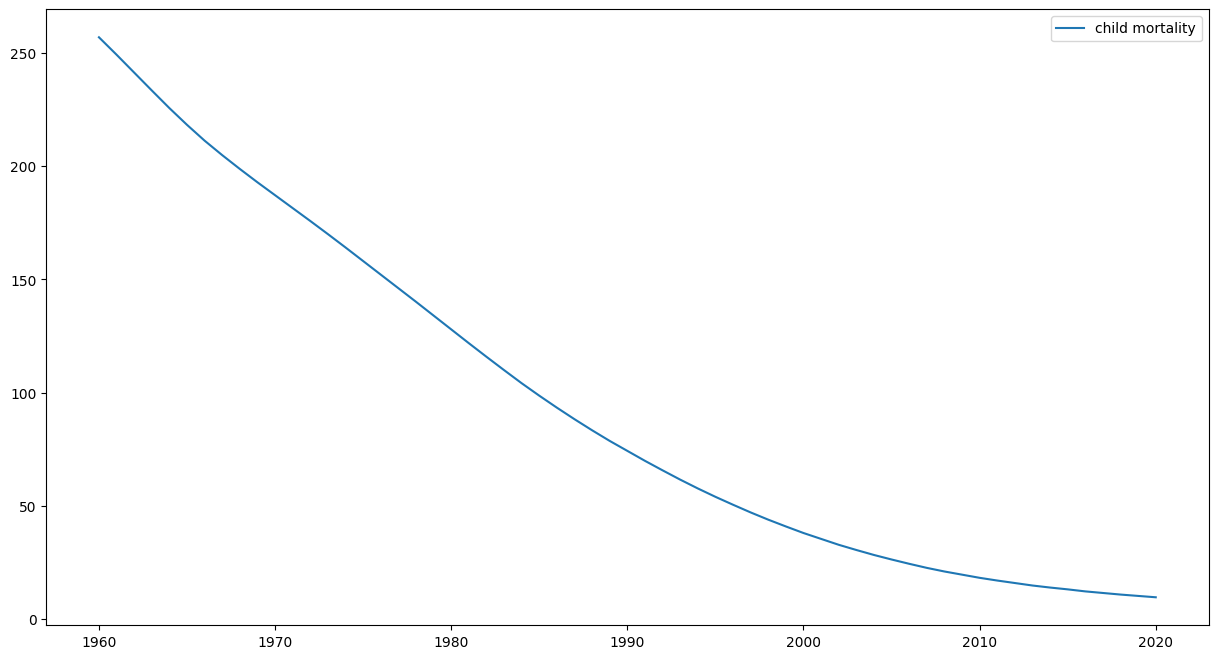

In [271]:
plt.rcParams['figure.figsize'] = 15,8
mortality[mortality['country']=='Turkiye'].plot()

<AxesSubplot:>

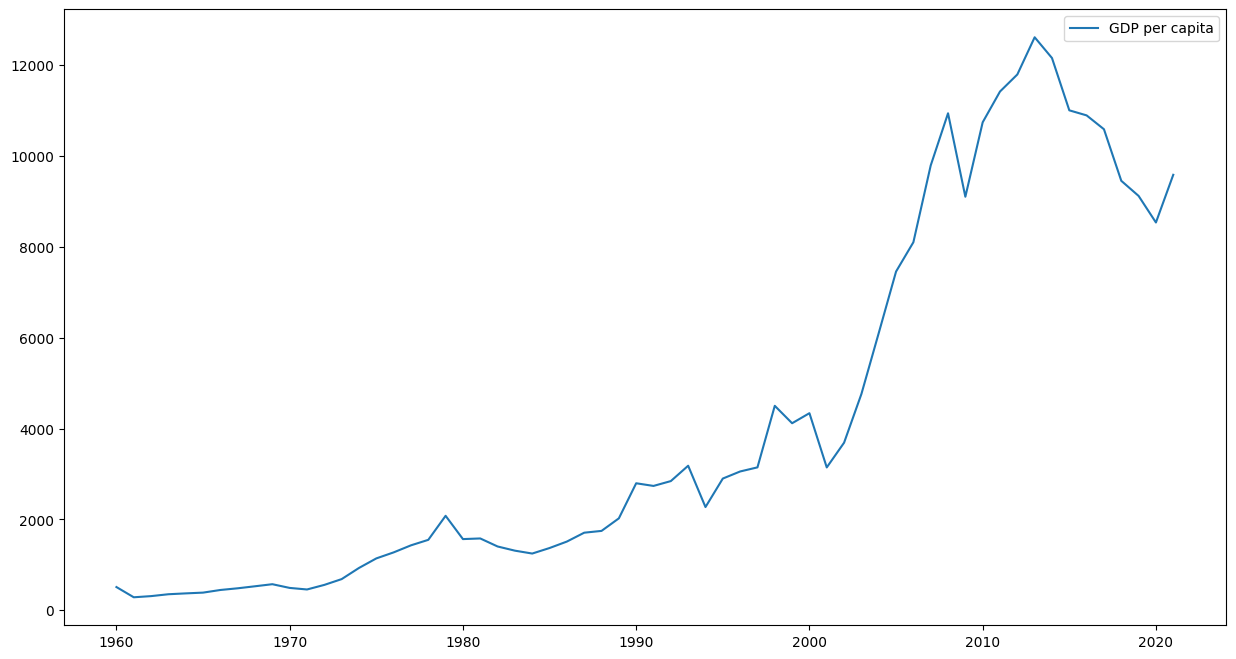

In [272]:
GDP[GDP['country']=='Turkiye'].plot()

<AxesSubplot:>

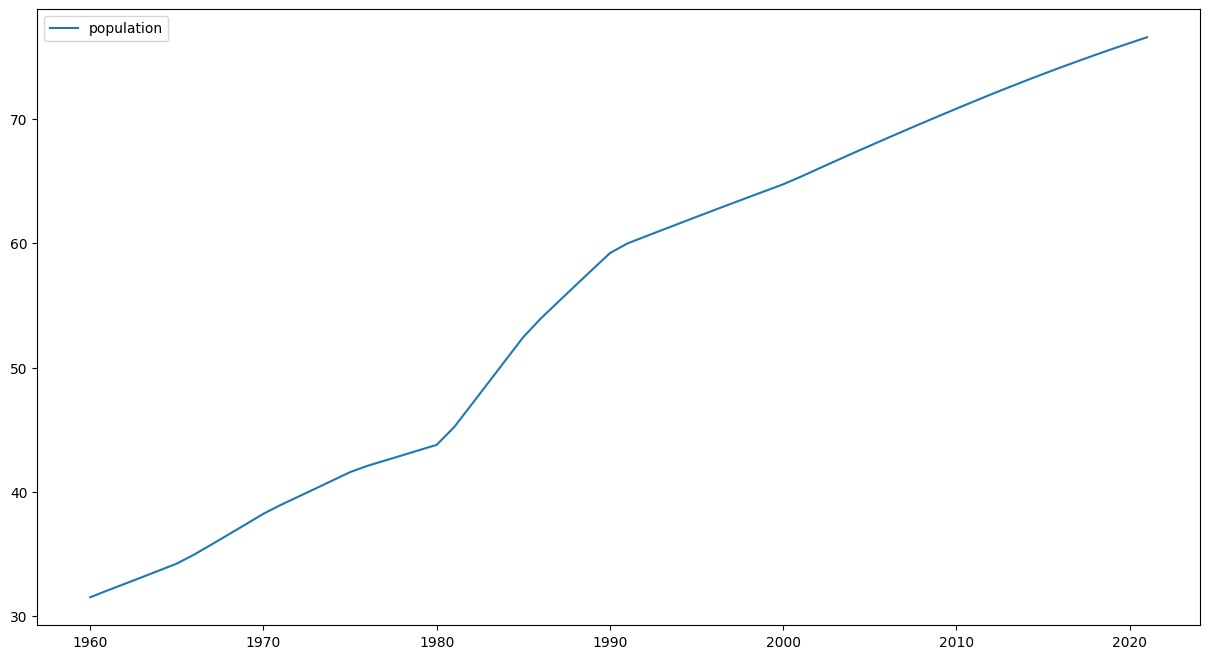

In [260]:
population[population['country']=='Turkiye'].plot()

# Scatter Plots

In [274]:
xs = GDP.groupby('country').mean()
ys = mortality.groupby('country').mean()
ss = population.groupby('country').mean()
res = xs.join([ys,ss],how='inner')
res

,GDP per capita,child mortality,population
country,,,
Afghanistan,287.200843,191.232787,18.735984
Africa Eastern and Southern,809.623423,112.016765,25.159978
Africa Western and Central,799.223246,146.090185,30.744779
Albania,2450.017811,33.683721,40.807468
Algeria,2192.476496,105.527869,52.958435
...,...,...,...
West Bank and Gaza,2270.062873,42.341304,65.371210
World,4866.678657,63.941935,43.938170
"Yemen, Rep.",818.475499,178.177049,22.277565


Text(0.5, 0, 'GDP')

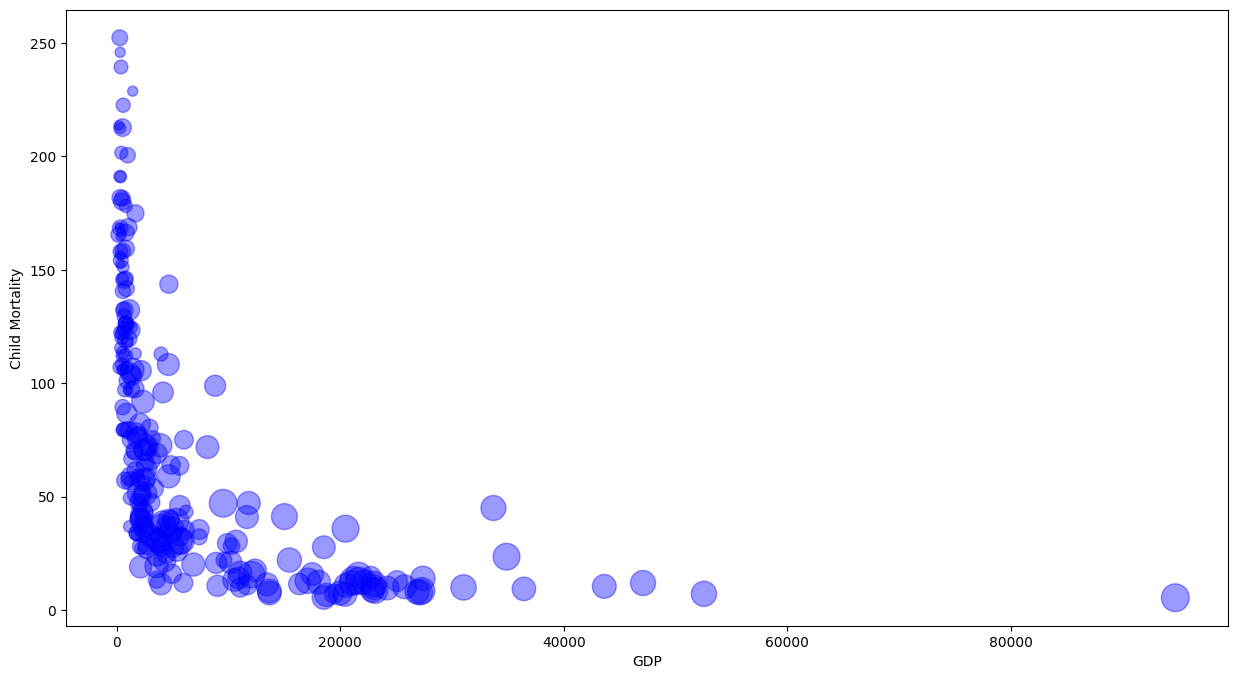

In [275]:
plt.scatter(res.iloc[:,0], res.iloc[:,1], s=res.iloc[:,2]*4, c='blue', alpha=0.4)
plt.ylabel('Child Mortality')
plt.xlabel('GDP')

Text(0.5, 0, 'GDP (log)')

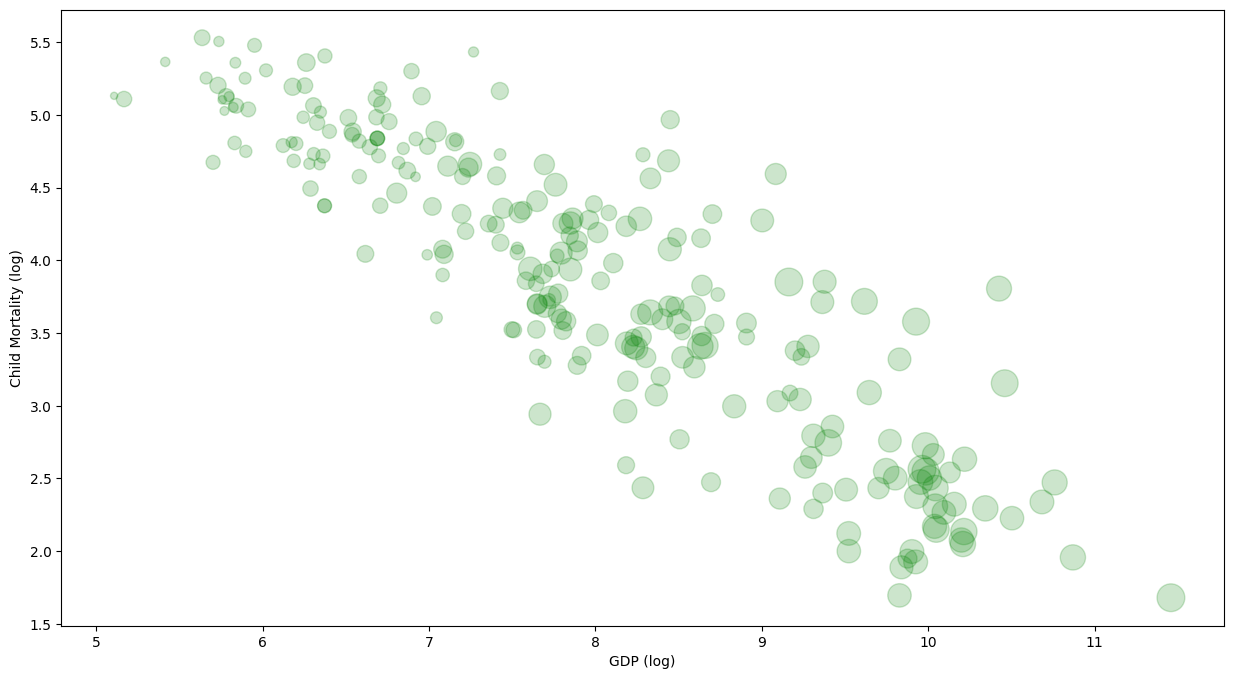

In [278]:
plt.scatter(np.log(res.iloc[:,0]), np.log(res.iloc[:,1]), s=res.iloc[:,2]*4, c='green', alpha=0.2)
plt.ylabel('Child Mortality (log)')
plt.xlabel('GDP (log)')

<AxesSubplot:xlabel='GDP per capita', ylabel='child mortality'>

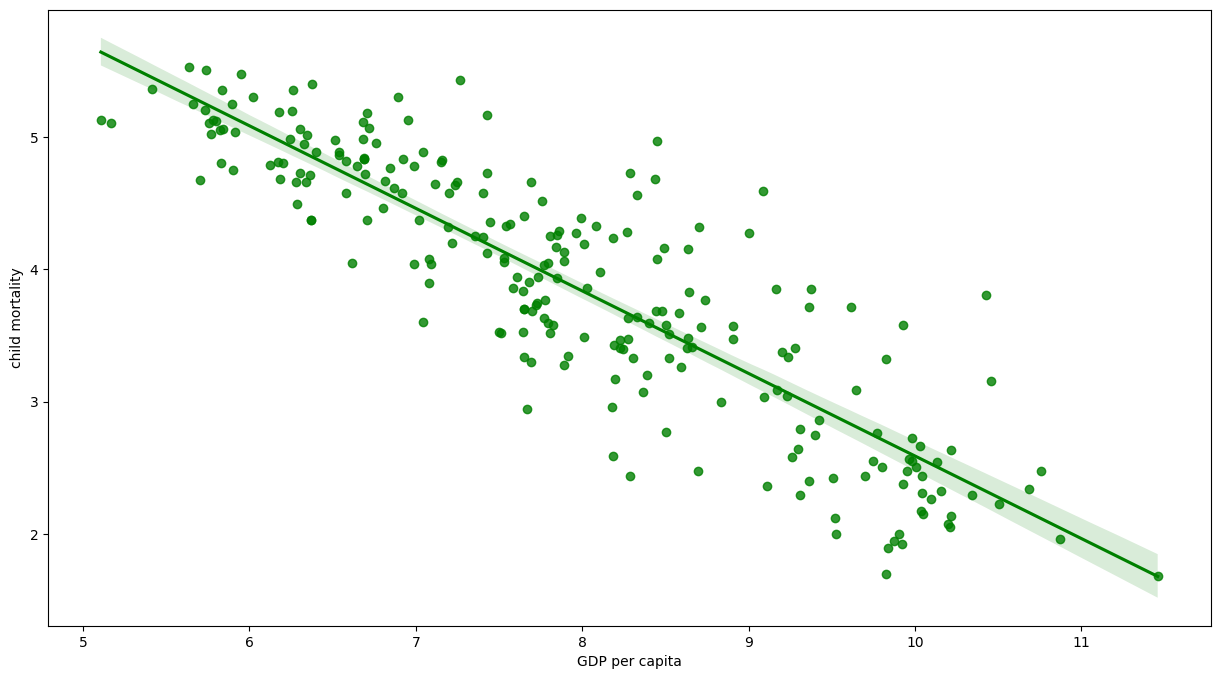

In [277]:
sns.regplot(x=np.log(res.iloc[:,0]), y=np.log(res.iloc[:,1]), color='green')

# Network Plots

In [279]:
with urlopen('https://programminghistorian.org/assets/exploring-and-analyzing-network-data-with-python/quakers_nodelist.csv') as url:
    nodes = pd.read_csv(url)
    
nodes

,Name,Historical Significance,Gender,Birthdate,Deathdate,ID
0,Joseph Wyeth,religious writer,male,1663,1731,10013191
1,Alexander Skene of Newtyle,local politician and author,male,1621,1694,10011149
2,James Logan,colonial official and scholar,male,1674,1751,10007567
3,Dorcas Erbery,Quaker preacher,female,1656,1659,10003983
4,Lilias Skene,Quaker preacher and poet,male,1626,1697,10011152
...,...,...,...,...,...,...
114,Thomas Ellwood,religious controversialist,male,1639,1713,10003945
115,William Simpson,Quaker preacher,male,1627,1671,10011114
116,Samuel Bownas,Quaker minister and writer,male,1677,1753,10001390
117,John Perrot,Quaker schismatic,male,1555,1665,10009584


In [280]:
women = set(nodes[nodes['Gender'] == 'female']['Name'])
women

{'Alice Curwen',
 'Anne Camm',
 'Anne Conway Viscountess Conway and Killultagh',
 'Dorcas Erbery',
 'Dorothy Waugh',
 'Elizabeth Hooten',
 'Elizabeth Leavens',
 'Grace Chamber',
 'Hannah Stranger',
 'Isabel Yeamans',
 'Jane Sowle',
 'Katharine Evans',
 'Lydia Lancaster',
 'Margaret Fell',
 'Martha Simmonds',
 'Mary Fisher',
 'Mary Penington',
 'Mary Pennyman',
 'Mary Prince',
 'Rebecca Travers',
 'Sarah Cheevers',
 'Sarah Gibbons'}

In [281]:
with urlopen('https://programminghistorian.org/assets/exploring-and-analyzing-network-data-with-python/quakers_edgelist.csv') as url:
    edges = pd.read_csv(url)
    
edges.columns = ['source','target']
edges.dropna(inplace=True)
edges

,source,target
0,George Keith,Robert Barclay
1,George Keith,Benjamin Furly
2,George Keith,Anne Conway Viscountess Conway and Killultagh
3,George Keith,Franciscus Mercurius van Helmont
4,George Keith,William Penn
...,...,...
169,Thomas Curtis,William Simpson
170,Thomas Curtis,John Story
171,Alexander Parker,Sir Charles Wager
172,John Story,Thomas Ellwood


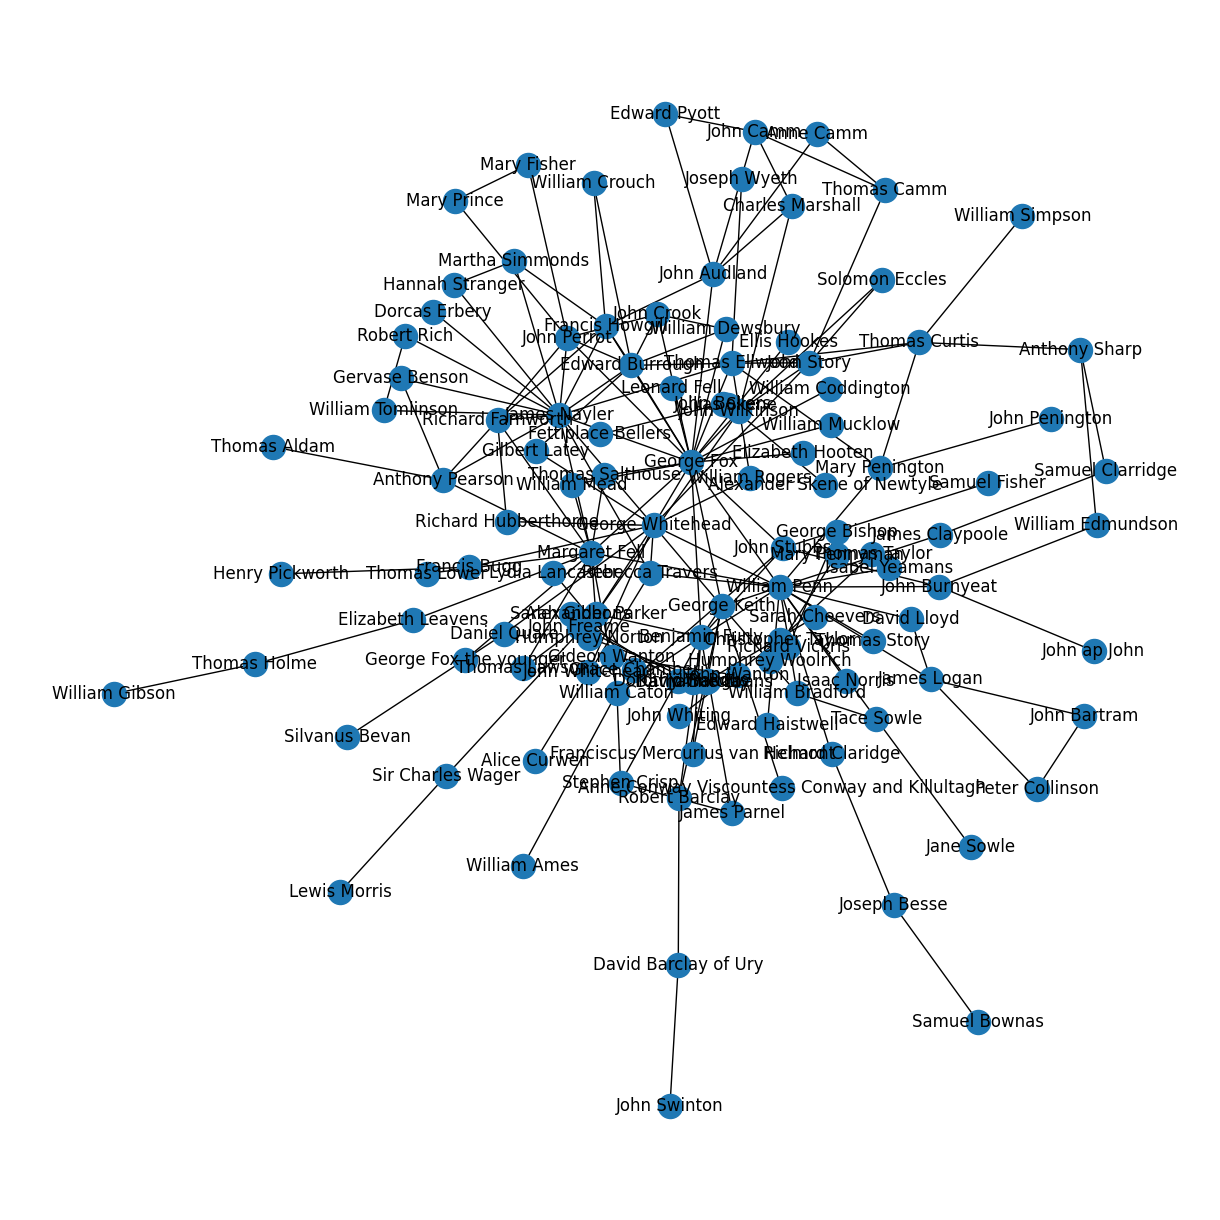

In [282]:
plt.rcParams['figure.figsize'] = 12,12

graph = nx.from_pandas_edgelist(pd.DataFrame(edges))
nx.draw_kamada_kawai(graph,with_labels=True)

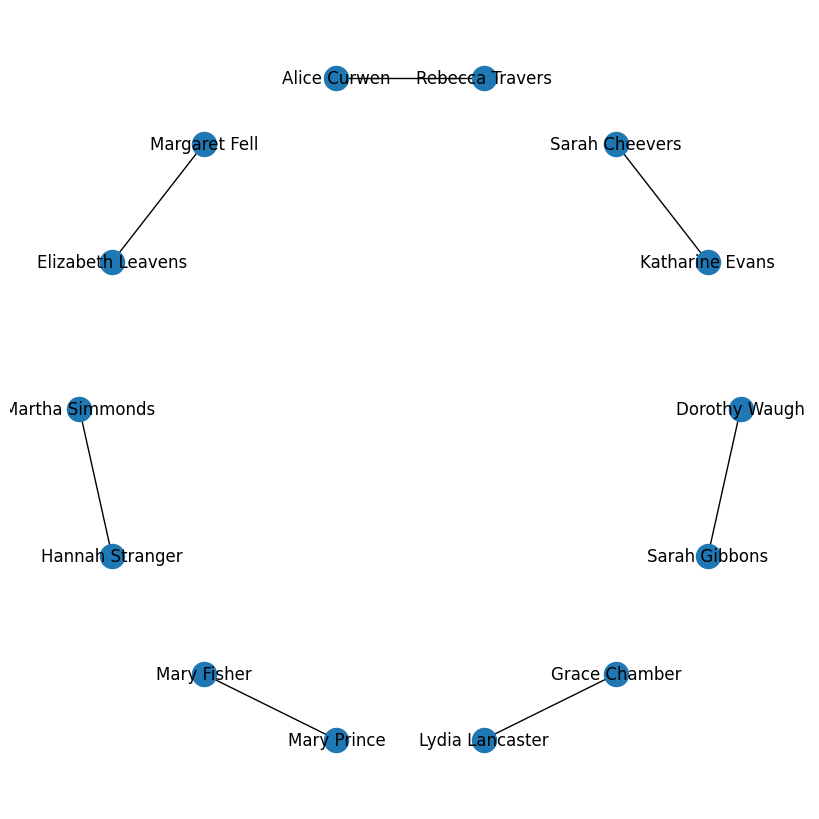

In [284]:
res = edges[[set(t).issubset(women) for s,t in edges.transpose().items()]]

plt.rcParams['figure.figsize'] = 8,8

graph = nx.from_pandas_edgelist(pd.DataFrame(res))
nx.draw_shell(graph,with_labels=True)

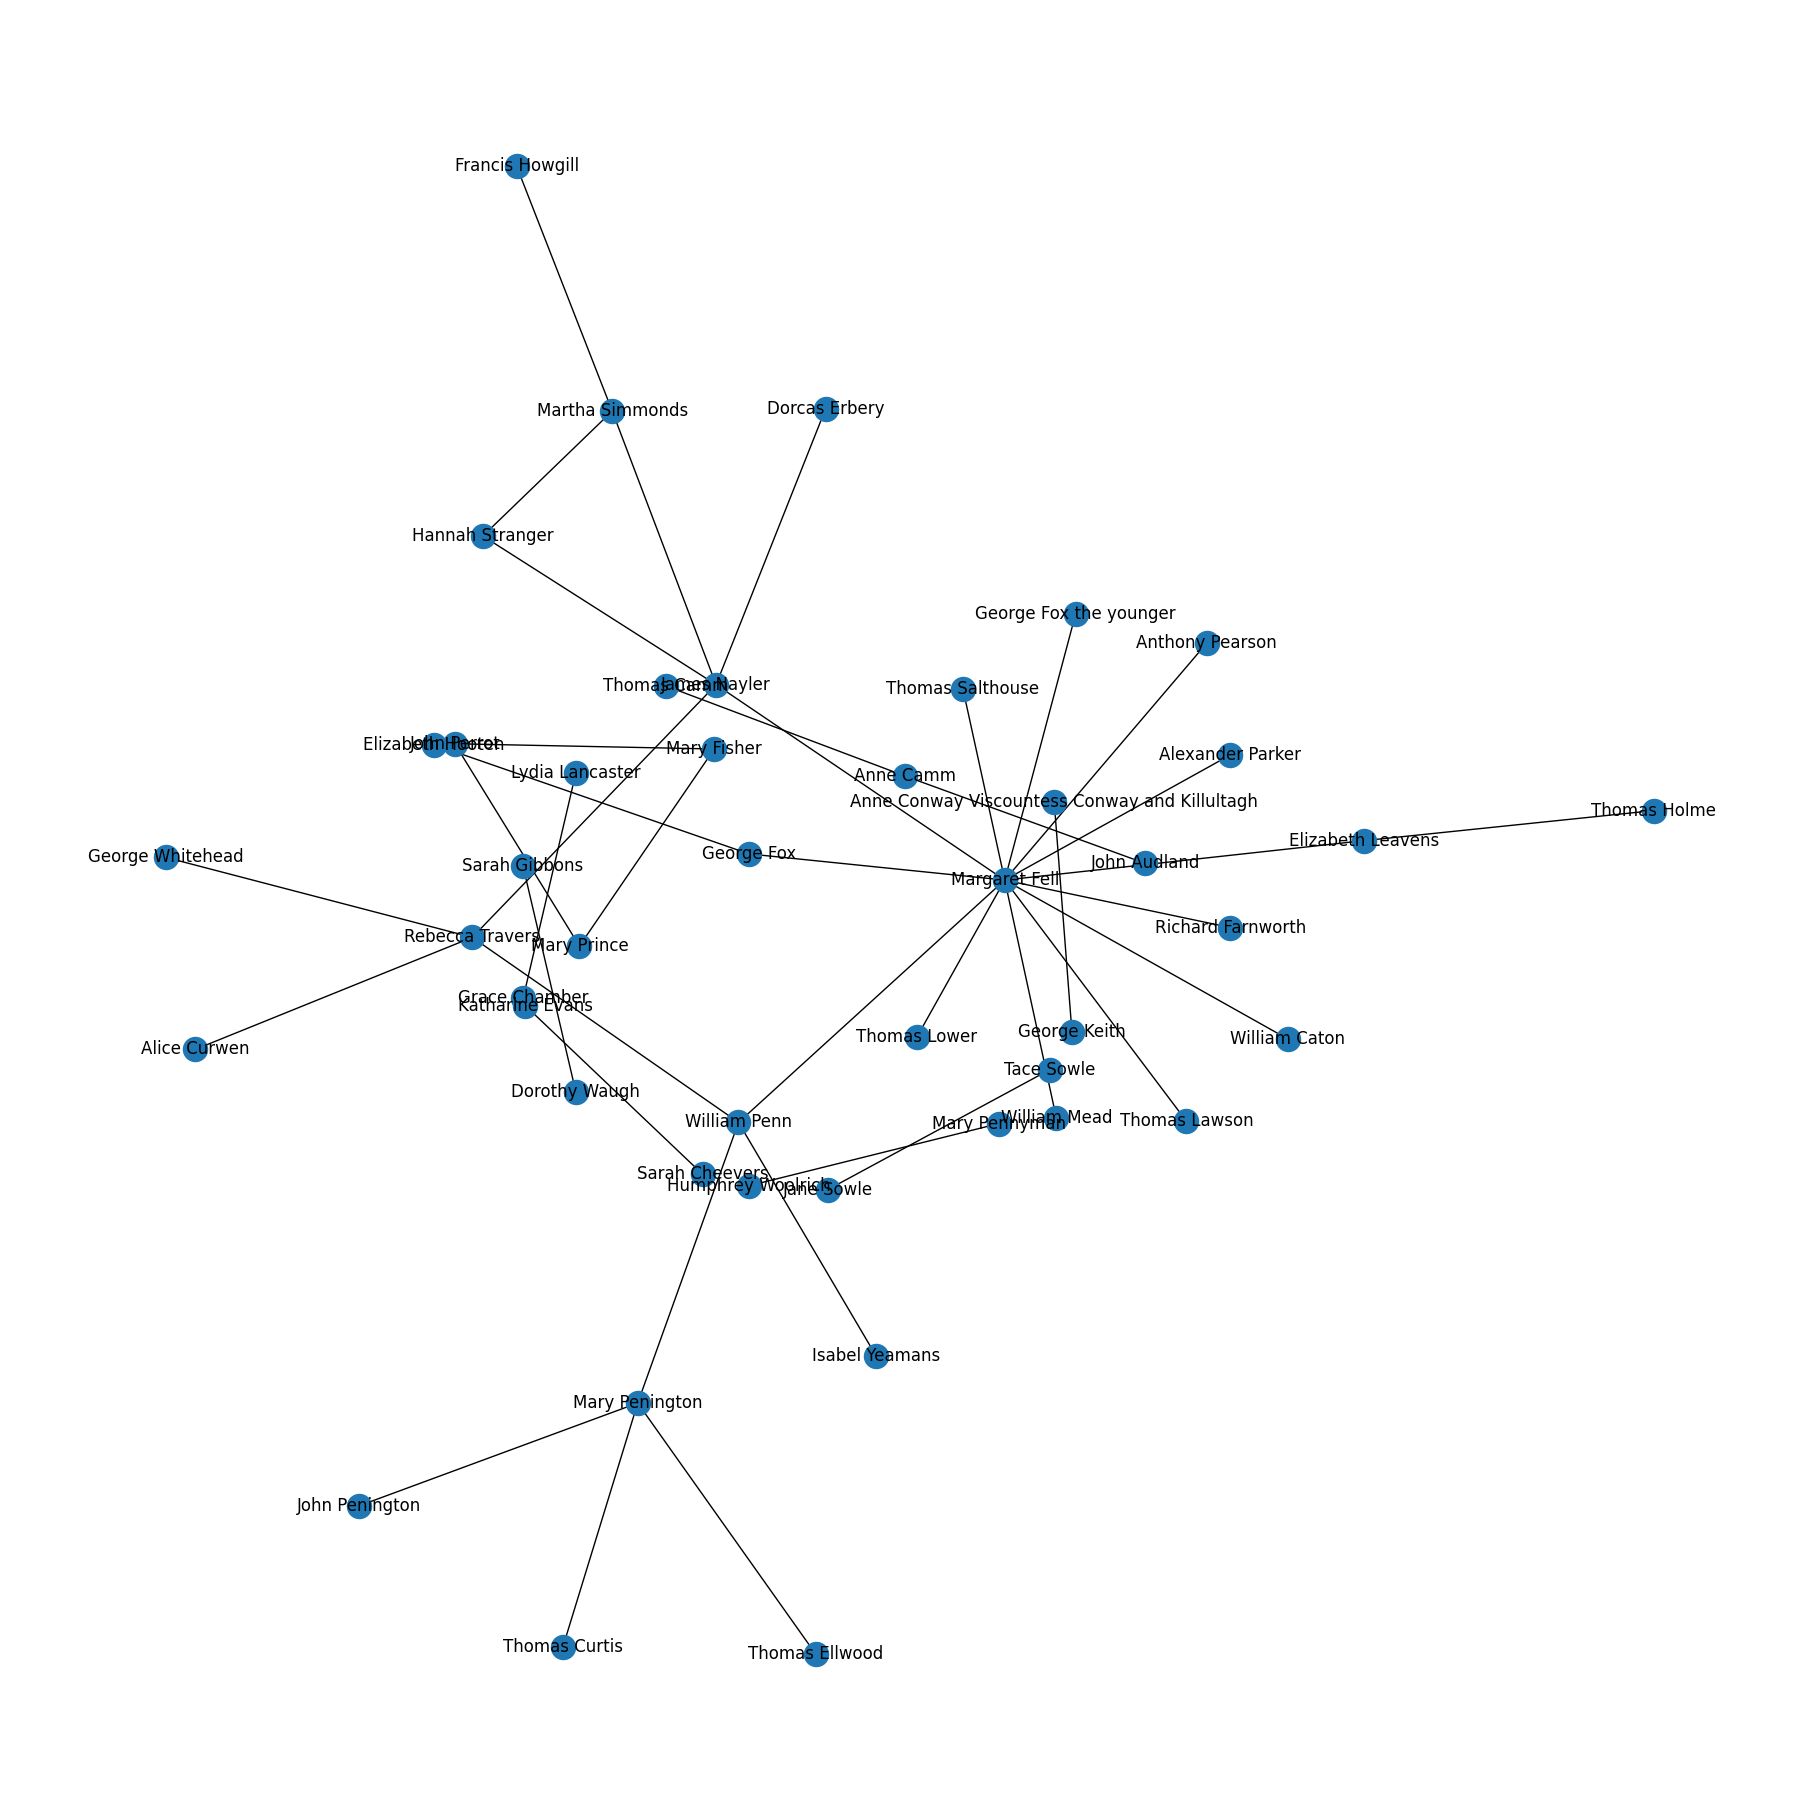

In [285]:
res = edges[[(t[0] in women) or (t[1] in women) for s,t in edges.transpose().items()]]

plt.rcParams['figure.figsize'] = 18,18

graph = nx.from_pandas_edgelist(pd.DataFrame(res))
nx.draw_kamada_kawai(graph,with_labels=True)

# Sports Data

Data came from [Sports-Statistics.com](https://sports-statistics.com/) where you can find data on [NBA](https://sports-statistics.com/sports-data/nba-basketball-datasets-csv-files/) and other [sports](https://sports-statistics.com/sports-data/sports-data-sets-for-data-modeling-visualization-predictions-machine-learning/).

In [286]:
with ZipFile('data/nba.zip','r') as file:
    data = pd.read_csv(file.open(file.filelist[0]))
    
data.head(10)

,URL,GameType,Location,Date,Time,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,...,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss,Unnamed: 40
0,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,720,NOP,Jump ball: D. Favors vs. M. Gasol (L. Ball gai...,...,NaN,NaN,NaN,NaN,NaN,NaN,D. Favors - favorde01,M. Gasol - gasolma01,L. Ball - balllo01,NaN
1,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,708,NOP,L. Ball misses 2-pt jump shot from 11 ft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,707,NOP,Offensive rebound by D. Favors,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,707,NOP,D. Favors makes 2-pt layup at rim,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,689,NOP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,685,NOP,Defensive rebound by J. Redick,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,676,NOP,J. Holiday misses 2-pt layup from 8 ft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,675,NOP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,671,NOP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,668,NOP,Defensive rebound by D. Favors,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [289]:
data.columns

Index(['URL', 'GameType', 'Location', 'Date', 'Time', 'WinningTeam', 'Quarter',
       'SecLeft', 'AwayTeam', 'AwayPlay', 'AwayScore', 'HomeTeam', 'HomePlay',
       'HomeScore', 'Shooter', 'ShotType', 'ShotOutcome', 'ShotDist',
       'Assister', 'Blocker', 'FoulType', 'Fouler', 'Fouled', 'Rebounder',
       'ReboundType', 'ViolationPlayer', 'ViolationType', 'TimeoutTeam',
       'FreeThrowShooter', 'FreeThrowOutcome', 'FreeThrowNum', 'EnterGame',
       'LeaveGame', 'TurnoverPlayer', 'TurnoverType', 'TurnoverCause',
       'TurnoverCauser', 'JumpballAwayPlayer', 'JumpballHomePlayer',
       'JumpballPoss', 'Unnamed: 40'],
      dtype='object')

In [290]:
subset = data[(data['Date']=='October 22 2019') & (data['WinningTeam']=='TOR')]
subset

,URL,GameType,Location,Date,Time,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,...,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss,Unnamed: 40
0,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,720,NOP,Jump ball: D. Favors vs. M. Gasol (L. Ball gai...,...,NaN,NaN,NaN,NaN,NaN,NaN,D. Favors - favorde01,M. Gasol - gasolma01,L. Ball - balllo01,NaN
1,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,708,NOP,L. Ball misses 2-pt jump shot from 11 ft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,707,NOP,Offensive rebound by D. Favors,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,707,NOP,D. Favors makes 2-pt layup at rim,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,689,NOP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,5,10,NOP,J. Holiday misses 3-pt jump shot from 27 ft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
561,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,5,8,NOP,Offensive rebound by N. Melli,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
562,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,5,6,NOP,Turnover by J. Redick (step out of bounds),...,NaN,NaN,J. Redick - redicjj01,step out of bounds,NaN,NaN,NaN,NaN,NaN,NaN
563,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,5,0,NOP,End of 1st overtime,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [325]:
tmp1 = subset[['Fouled','Fouler']]
tmp2 = subset[['Fouler','Fouled']]
tmp = pd.concat((tmp1,tmp2))
tmp.dropna(inplace=True)
res = pd.crosstab(tmp,columns=)
res

TypeError: crosstab() missing 1 required positional argument: 'columns'

In [322]:
pd.crosstab(tmp['Fouler'],tmp['Fouled'])

Fouled,B. Ingram - ingrabr01,F. Jackson - jacksfr01,F. VanVleet - vanvlfr01,J. Hart - hartjo01,J. Holiday - holidjr01,J. Okafor - okafoja01,J. Redick - redicjj01,K. Lowry - lowryky01,K. Williams - willike04,L. Ball - balllo01,M. Gasol - gasolma01,N. Alexander-Walker - alexani01,N. Melli - mellini01,O. Anunoby - anunoog01,P. Siakam - siakapa01,S. Ibaka - ibakase01,T. Davis - daviste02
Fouler,,,,,,,,,,,,,,,,,
B. Ingram - ingrabr01,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,0,0
D. Favors - favorde01,0,0,0,0,0,0,0,0,0,0,2,0,0,4,2,2,0
F. Jackson - jacksfr01,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,2
J. Hart - hartjo01,0,0,0,0,0,0,0,4,0,0,0,0,0,0,4,0,0
J. Holiday - holidjr01,0,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0
J. Okafor - okafoja01,0,0,0,0,0,0,0,4,0,0,0,0,0,0,2,0,0
J. Redick - redicjj01,0,0,0,0,0,0,0,4,0,0,0,0,0,0,2,0,0
K. Lowry - lowryky01,4,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
K. Williams - willike04,0,0,2,0,0,0,0,4,0,0,0,0,0,0,2,2,0


The following data comes from [Football Data](https://www.football-data.org/).

In [168]:
with open('/home/kaygun/.config/sportradar.api') as file:
    apis = json.load(file)
    
apiKey = apis['Soccer']
base = 'https://api.sportradar.us/soccer/trial/v4/en/'

In [169]:
point = 'competitions.json?'

with urlopen(f'{base}{point}api_key={apiKey}') as url:
    tmp = json.loads(url.read())

leagues = {x['name']: x['id'] for x in tmp['competitions']}
leagues

{'Euro Cup': 'sr:competition:1',
 'UEFA Champions League': 'sr:competition:7',
 'LaLiga': 'sr:competition:8',
 'Challenger Pro League': 'sr:competition:9',
 'WC Qualification, UEFA': 'sr:competition:11',
 'WC Qualification, CAF': 'sr:competition:13',
 'World Cup Qualification, CONCACAF': 'sr:competition:14',
 'World Cup': 'sr:competition:16',
 'Premier League': 'sr:competition:33656',
 'Championship': 'sr:competition:701',
 'FA Cup': 'sr:competition:23745',
 'Eliteserien': 'sr:competition:20',
 'EFL Cup': 'sr:competition:21',
 '1st Division': 'sr:competition:171',
 'Serie A': 'sr:competition:23',
 'League One': 'sr:competition:24',
 'League Two': 'sr:competition:25',
 'U21 Euro Qualification': 'sr:competition:26',
 'European Championship Qualification': 'sr:competition:27',
 'AFC Asian Cup QF': 'sr:competition:28',
 'NM Cup': 'sr:competition:29',
 'Ligue 1': 'sr:competition:1211',
 'Bundesliga': 'sr:competition:45',
 'Premiership': 'sr:competition:200',
 'Eredivisie': 'sr:competition:3

In [171]:
league = res["UEFA Champions League"]
point = f'competitions/{league}/seasons.json?'

with urlopen(f'{base}{point}api_key={apiKey}') as url:
    tmp = json.loads(url.read())

seasons = {x['name']: x['id'] for x in tmp['seasons']}
seasons

{'UEFA Champions League 20/21': 'sr:season:77549',
 'UEFA Champions League 21/22': 'sr:season:83926',
 'UEFA Champions League 22/23': 'sr:season:93959'}

In [178]:
season = seasons["UEFA Champions League 20/21"]
point = f'seasons/{season}/competitors.json?'

with urlopen(f'{base}{point}api_key={apiKey}') as url:
    tmp = json.loads(url.read())

competitors = tmp['season_competitors']
competitors

[{'id': 'sr:competitor:17',
  'name': 'Manchester City',
  'short_name': 'Man City',
  'abbreviation': 'MCI'},
 {'id': 'sr:competitor:35',
  'name': 'Manchester United',
  'short_name': 'Man Utd',
  'abbreviation': 'MUN'},
 {'id': 'sr:competitor:38',
  'name': 'Chelsea FC',
  'short_name': 'Chelsea',
  'abbreviation': 'CHE'},
 {'id': 'sr:competitor:44',
  'name': 'Liverpool FC',
  'short_name': 'Liverpool',
  'abbreviation': 'LIV'},
 {'id': 'sr:competitor:661',
  'name': 'Molde FK',
  'short_name': 'Molde',
  'abbreviation': 'MFK'},
 {'id': 'sr:competitor:1289',
  'name': 'FC Midtjylland',
  'short_name': 'Midtjylland',
  'abbreviation': 'FCM'},
 {'id': 'sr:competitor:1641',
  'name': 'Olympique Marseille',
  'short_name': 'Marseille',
  'abbreviation': 'OM'},
 {'id': 'sr:competitor:1644',
  'name': 'Paris Saint-Germain',
  'short_name': 'PSG',
  'abbreviation': 'PSG'},
 {'id': 'sr:competitor:1658',
  'name': 'Stade Rennes',
  'short_name': 'Stade Rennes',
  'abbreviation': 'REN'},
 {'

In [181]:
season = seasons["UEFA Champions League 20/21"]
point = f'seasons/{season}/standings.json?'

with urlopen(f'{base}{point}api_key={apiKey}') as url:
    tmp = json.loads(url.read())


In [228]:
tmp['standings'][0]

{'tie_break_rule': 'At the end of the group phase, in the event that two (or more) teams have an equal number of points the following rules break the tie:\r\n1. Head-to-head\r\n2. Goal difference\r\n3. Goals scored\r\nDuring the group phase, the following tie-breaking procedures are used:\r\n1. Goal difference\r\n2. Goals scored',
 'type': 'total',
 'groups': [{'stage': {'order': 3,
    'type': 'league',
    'phase': 'regular season',
    'start_date': '2020-10-20',
    'end_date': '2020-12-10',
    'year': '20/21'},
   'id': 'sr:league:52495',
   'name': 'Group A',
   'live': False,
   'standings': [{'rank': 1,
     'played': 6,
     'win': 5,
     'loss': 0,
     'draw': 1,
     'goals_for': 18,
     'goals_against': 5,
     'goals_diff': 13,
     'competitor': {'id': 'sr:competitor:2672',
      'name': 'Bayern Munich',
      'country': 'Germany',
      'country_code': 'DEU',
      'abbreviation': 'BMU',
      'gender': 'male',
      'form': 'WWWDW'},
     'points': 16,
     'current

In [229]:
res = tmp['standings'][0]

{y['name']: {z['competitor']['name'] 
              for z in y['standings']} for y in res['groups']} 
 

{'Group A': {'Atletico Madrid',
  'Bayern Munich',
  'FC Salzburg',
  'Lokomotiv Moscow'},
 'Group B': {'Borussia Monchengladbach',
  'FC Shakhtar Donetsk',
  'Inter Milano',
  'Real Madrid'},
 'Group C': {'FC Porto',
  'Manchester City',
  'Olympiacos Piraeus',
  'Olympique Marseille'},
 'Group D': {'Ajax Amsterdam',
  'Atalanta BC',
  'FC Midtjylland',
  'Liverpool FC'},
 'Group E': {'Chelsea FC', 'FK Krasnodar', 'Sevilla FC', 'Stade Rennes'},
 'Group F': {'Borussia Dortmund',
  'Club Brugge',
  'FK Zenit Saint Petersburg',
  'Lazio Rome'},
 'Group G': {'FC Barcelona',
  'FC Dynamo Kiev',
  'Ferencvarosi Budapest',
  'Juventus Turin'},
 'Group H': {'Istanbul Basaksehir',
  'Manchester United',
  'Paris Saint-Germain',
  'RB Leipzig'}}